In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
"""for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))"""


import tensorflow as tf
import matplotlib.pyplot as plt


from tensorflow import keras

from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_dir =  "../input/fer2013/train"
test_dir = "../input/fer2013/test"

In [3]:
train_datagenerator = ImageDataGenerator( rescale = 1./255,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,)
validation_datagenerator = ImageDataGenerator( rescale = 1./255,)


In [4]:
train_generator = train_datagenerator.flow_from_directory(directory = train_dir,
                                                         target_size = (48,48),
                                                         batch_size = 64,
                                                         color_mode = "grayscale",
                                                         class_mode = "categorical")

validation_generator = validation_datagenerator.flow_from_directory(directory = test_dir,
                                                        target_size = (48,48),
                                                         batch_size = 64,
                                                         color_mode = "grayscale",
                                                         class_mode = "categorical")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [16]:
model = keras.models.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [17]:
model.compile(
optimizer = Adam(),
loss='categorical_crossentropy', 
metrics=['accuracy'])

In [5]:
epochs = 60


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 30976)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               15860224  
                                                      

In [20]:
model.fit(x = train_generator, epochs = epochs, validation_data = validation_generator)

Epoch 1/60


2023-05-17 11:03:48.029268: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


449/449 [==============================] - 217s 480ms/step - loss: 1.7330 - accuracy: 0.3046 - val_loss: 1.5664 - val_accuracy: 0.3933
Epoch 2/60
449/449 [==============================] - 66s 146ms/step - loss: 1.5827 - accuracy: 0.3836 - val_loss: 1.4199 - val_accuracy: 0.4596
Epoch 3/60
449/449 [==============================] - 65s 146ms/step - loss: 1.5167 - accuracy: 0.4160 - val_loss: 1.3668 - val_accuracy: 0.4806
Epoch 4/60
449/449 [==============================] - 65s 145ms/step - loss: 1.4725 - accuracy: 0.4284 - val_loss: 1.3377 - val_accuracy: 0.4834
Epoch 5/60
449/449 [==============================] - 65s 146ms/step - loss: 1.4364 - accuracy: 0.4499 - val_loss: 1.3061 - val_accuracy: 0.5015
Epoch 6/60
449/449 [==============================] - 66s 147ms/step - loss: 1.4140 - accuracy: 0.4547 - val_loss: 1.2889 - val_accuracy: 0.4979
Epoch 7/60
449/449 [==============================] - 66s 147ms/step - loss: 1.3886 - accuracy: 0.4666 - val_loss: 1.2967 - val_accuracy: 0.

In [22]:
model.save("model1.h5")

In [6]:
model2 = keras.models.Sequential()


In [7]:
model2 = keras.models.Sequential()

model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model2.add(BatchNormalization())

model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())

model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())

model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(7, activation='softmax'))

In [8]:
model2.compile(
optimizer = Adam(),
loss='categorical_crossentropy', 
metrics=['accuracy'])

In [9]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)      

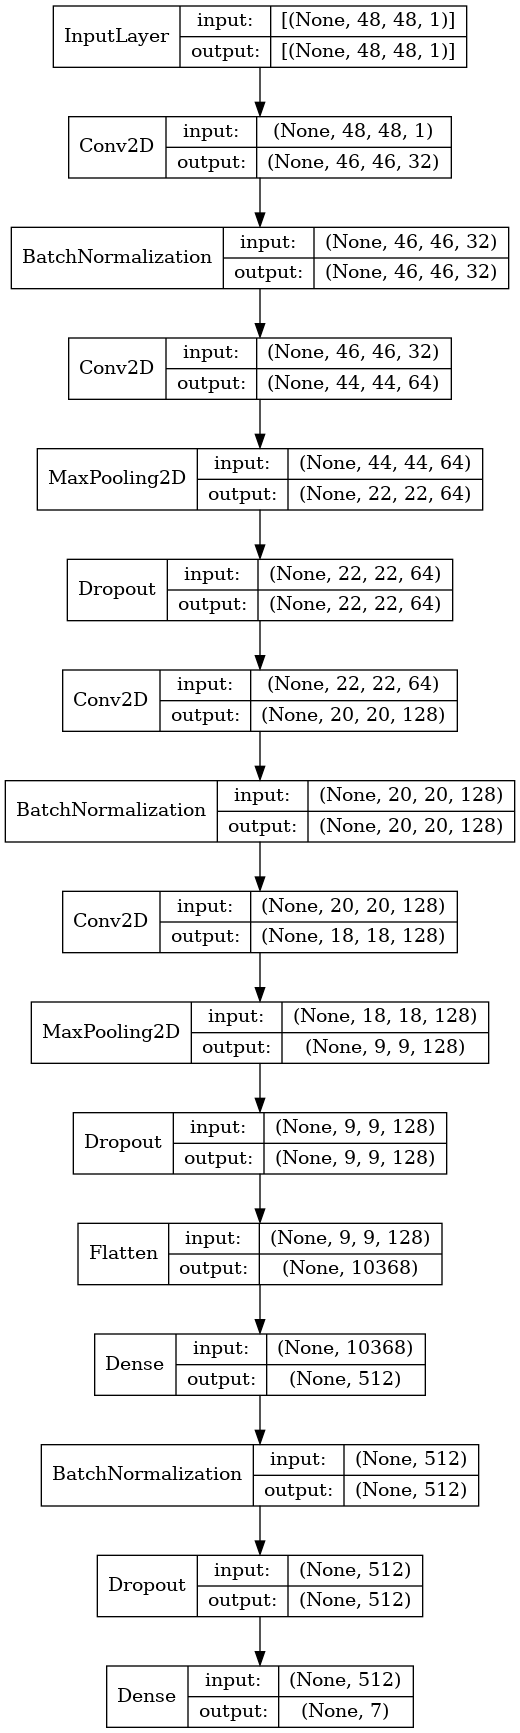

In [14]:
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [14]:
checkpoint = ModelCheckpoint("Model2.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
history2 = model2.fit(x = train_generator, epochs = epochs, validation_data = validation_generator, callbacks=[checkpoint])

Epoch 1/60


2023-05-17 14:49:16.876955: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


449/449 [==============================] - ETA: 0s - loss: 1.9289 - accuracy: 0.2964
Epoch 1: val_accuracy improved from -inf to 0.26080, saving model to Model2.h5
449/449 [==============================] - 245s 507ms/step - loss: 1.9289 - accuracy: 0.2964 - val_loss: 1.9288 - val_accuracy: 0.2608
Epoch 2/60
449/449 [==============================] - ETA: 0s - loss: 1.5415 - accuracy: 0.4161
Epoch 2: val_accuracy improved from 0.26080 to 0.48189, saving model to Model2.h5
449/449 [==============================] - 67s 150ms/step - loss: 1.5415 - accuracy: 0.4161 - val_loss: 1.3440 - val_accuracy: 0.4819
Epoch 3/60
449/449 [==============================] - ETA: 0s - loss: 1.3737 - accuracy: 0.4759
Epoch 3: val_accuracy improved from 0.48189 to 0.50237, saving model to Model2.h5
449/449 [==============================] - 67s 149ms/step - loss: 1.3737 - accuracy: 0.4759 - val_loss: 1.2997 - val_accuracy: 0.5024
Epoch 4/60
449/449 [==============================] - ETA: 0s - loss: 1.3005 

Resnet50

In [14]:
resnet_model = keras.models.Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top = False, 
                                                        input_shape = (48,48,3),
                                                       pooling = 'avg',
                                                       classes = 7,
                                                       weights='imagenet')
for each_layer in pretrained_model.layers:
    each_layer.trainable = False
resnet_model.add(pretrained_model)


Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5: None -- [Errno -3] Temporary failure in name resolution

In [ ]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(7,activation='softmax'))